# Convolutional Neural Networks

In [1]:
from keras.datasets import fashion_mnist as mnist
from keras.utils import to_categorical
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
Y_train=to_categorical(Y_train,10)
Y_test=to_categorical(Y_test,10)

Using TensorFlow backend.


In [2]:
categories='''0 T-shirt/top 
1 Trouser 
2 Pullover 
3 Dress 
4 Coat 
5 Sandal 
6 Shirt 
7 Sneaker 
8 Bag 
9 Ankle boot'''
mp={}
for i in categories.strip().split('\n'):
    l=i.strip().split()
    mp[int(l[0])]=" ".join(l[1:])
print(mp)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [3]:
X_train=X_train.astype("float32")
Y_train=Y_train.astype("float32")
X_test=X_test.astype("float32")
Y_test=Y_test.astype("float32")
X_train/=255
X_test/=255
X_train=X_train.reshape(X_train.shape[:]+tuple([1]))
X_test=X_test.reshape(X_test.shape[:]+tuple([1]))
print(X_train.shape)

(60000, 28, 28, 1)


In [4]:
print(Y_train.shape)

(60000, 10)


In [5]:
import tensorflow as tf

In [6]:
def gen_bias(shape):
    return tf.Variable(tf.truncated_normal([shape]))
def gen_filter(shape):
    return tf.Variable(tf.truncated_normal(shape))

In [7]:
def conv_layer(inp,filter_size,num_channels,num_filter):
    filter=gen_filter([filter_size,filter_size,num_channels,num_filter])
    bias=gen_bias(num_filter)
    layer=tf.nn.conv2d(input=inp,filter=filter,strides=[1,1,1,1],padding="SAME")
    layer+=bias
    layer=tf.nn.max_pool(layer,ksize=[1,2,2,1],strides=[1,1,1,1],padding="SAME")
    return tf.nn.relu(layer)

In [8]:
def dense_layer(inp,output):
    weights=gen_filter([int(inp.shape[-1]),output])
    bias=gen_bias(output)
    return tf.matmul(inp,weights)+bias

In [9]:
def flatten_layer(input):
    return tf.reshape(input,[-1,input.shape[1:].num_elements()])

In [10]:
def build_cnn(inp,out):
    layer=conv_layer(inp,3,1,54)
    layer=conv_layer(layer,3,54,40)
    layer=flatten_layer(layer)
    layer=dense_layer(layer,20)
    layer=dense_layer(layer,out)
    return layer

In [11]:
x=tf.placeholder(tf.float32,[None,28,28,1])
y=tf.placeholder(tf.float32,[None,10])

In [12]:
x.shape[2:4].num_elements()

28

In [13]:
model=build_cnn(x,10)
loss=tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=y)
loss=tf.reduce_mean(loss)
pred=tf.nn.softmax(model)
train=tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
correct=tf.equal(tf.argmax(pred,axis=1),tf.argmax(y,axis=1))
acc=tf.reduce_mean(tf.cast(correct,tf.float32))

In [14]:
print(X_train[0].shape)

(28, 28, 1)


In [23]:
import matplotlib.pyplot as plt
import numpy as np
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,10000,32):
    x_=X_train[i:i+32]
    y_=Y_train[i:i+32]
    l,_=sess.run([loss,train],feed_dict={x:x_,y:y_})
    if not i%100:
        print("[{}] Loss = ".format(i),l)

[0] Loss =  20988.568
[800] Loss =  703.8074
[1600] Loss =  264.0749
[2400] Loss =  178.94798
[3200] Loss =  141.22296
[4000] Loss =  123.37803
[4800] Loss =  36.20151
[5600] Loss =  35.553577
[6400] Loss =  41.336372
[7200] Loss =  53.81034
[8000] Loss =  41.49269
[8800] Loss =  36.402836
[9600] Loss =  19.562931


Prediction:  Sneaker


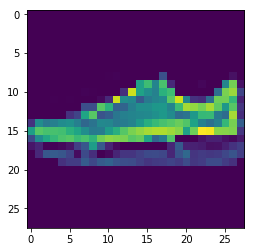

In [31]:
x_=X_test[9]
plt.imshow(x_.flatten().reshape(28,28))
x_=x_.reshape(tuple([1])+x_.shape[:])
p=sess.run(pred,feed_dict={x:x_})
print("Prediction: ",mp[np.argmax(p)])
plt.show()

In [32]:
#closing Session
sess.close()